In [2]:
import h5py
import numpy as np
from datetime import datetime, timedelta
import solarpy as sp
import matplotlib.pyplot as plt

In [10]:
# Parameters
lat = 52.36  # north hemisphere
vnorm = np.array([-1, -1, -1])  # plane pointing upwards
start_day = datetime(2022, 7, 21)
n_days = 1# Initialize array
all_G = np.zeros(n_days * 24 * 60 * 60)

# Calculate irradiance for each second of the year
for n in range(n_days):
    dt = start_day + timedelta(days=n)
    t = [dt + timedelta(seconds=i) for i in range(0, 24 * 60*60, 1)]  # One data point per second
    G = [sp.irradiance_on_plane(vnorm, 0, i, lat) for i in t]
    all_G[n * 24 * 60 * 60: (n + 1) * 24 * 60 * 60] = G  # Add to the array

# Save to HDF5 file
with h5py.File('irradiance_data.h5', 'w') as hf:
    hf.create_dataset("irradiance",  data=all_G)

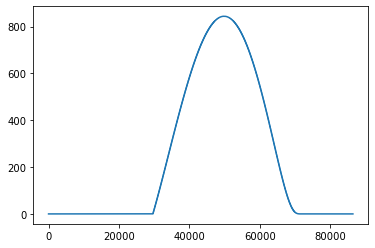

In [11]:
# Read from HDF5 file
with h5py.File('irradiance_data.h5', 'r') as hf:
    irradiance_data = hf['irradiance'][:]

plt.plot(all_G)

In [33]:
import pandas as pd

df = pd.DataFrame(all_G)
df['Temperature'] = np.full_like(all_G,2)

In [34]:
df

,0,Temperature
0,0.0,2.0
1,0.0,2.0
2,0.0,2.0
3,0.0,2.0
4,0.0,2.0
...,...,...
86395,0.0,2.0
86396,0.0,2.0
86397,0.0,2.0
86398,0.0,2.0


In [38]:
np.savetxt('datatestKKKKK%2d%2d%2d.csv'%(start_day.day,start_day.month,start_day.year),df)

datetime.datetime(2022, 7, 21, 0, 0)

In [19]:
start_day.day

21